<a href="https://colab.research.google.com/github/jairramirez365/Algoritmos-optimizacion/blob/main/Seminario_Algoritmos_Jair_Ramirez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Robinson Jair Ramirez Bustos   <br>
Url: https://github.com/jairramirez365/Algoritmos-optimizacion/blob/main/Seminario_Algoritmos_Jair_Ramirez.ipynb<br>
Problema:
> 1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Combinar cifras y operaciones

Descripción del problema: 3. Combinar cifras y operaciones

El problema consiste en diseñar un algoritmo que lo resuelva la combinatoria de 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las
operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/)
Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada






                                        

## (*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>





### Respuesta

Sin tener en cuenta las restriccion de que sea un valor entero, existen un Total de combinatorias posibles: 362.880
Este valor se calcula teniendo en cuenta la variable cont, dentro del codigo, que cuenta todas las iteracciones posibles sin discriminar, si la respuesta obtenida por el codigo es entero o decimal.

Sin tener en cuenta la restriccion que no hayan duplicados entre valores y  signos hay un total de 15,118,544
Este total se calcula partiendo de la combinacion de los digitos del 1 al 9, teniendo en cuenta que cada expresion tiene 5 numeros, por su parte las operaciones son 4 y tienen 4 signos cada expresion, lo que nos da como resultado un total de expresiones posibles permitiendo repeticiones:
9^5 × 4^4 = 59049 × 256 = 15,118,544




## ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




### Respuesta

In [ ]:
print(f'Combinaciones posibles teniendo en cuenta las restricciones : {len(resultados_duplicados)}')

Combinaciones posibles teniendo en cuenta las restricciones : 90000


## Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


### Respuesta

#### La estructura de datos que mejor se adapta es el formato texto, dado que desde el planteamiento del problema tuvimos acceso a la funcion eval de python que recibe como argumentos una expresion en formato string, por lo tanto, no tendria sentido pasarlo a otro tipo de dato y luego realizar la conversion al formato que recibe la funcion de evaluacion. Por otra parte, al ser cadenas de texto python procesa de manera rapida las operaciones e iteraciones entre cadenas de strings, esto es una ventaja dado que se debe realizar la concatenacion de la expresion dependiendo de los valores que va tomando por cada iteracion para recorrer todo el espacio muestral.

## Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

### Respuesta

#### - ¿Cuál es la función objetivo?

En el contexto de este problema, donde se busca construir expresiones válidas usando cinco dígitos (del 1 al 9 sin repetir) y cuatro operadores básicos (+, −, *, / sin repetir), la función objetivo consiste en:

**Obtener el valor entero que resulta al evaluar una expresión construida con la estructura dígito-operador-dígito, siguiendo las reglas establecidas.**

f(expresión) =
eval(expresión), si el resultado es un número entero

descartar, si hay error o resultado decimal



- ¿Es un problema de maximización o minimización?

Este no es un problema clásico de optimización en el que se busca un único valor óptimo. Más bien, se trata de **explorar el espacio completo de soluciones válidas** y determinar el rango de resultados enteros posibles.

Sin embargo, si lo analizamos desde el enfoque de optimización, el problema puede dividirse en dos subproblemas:

- **Maximización**: encontrar el **mayor valor entero** que se puede obtener al evaluar una expresión válida.
- **Minimización**: encontrar el **menor valor entero** alcanzable.

Vale la pena aclarar que se da esta interpretacion basandose en las preguntas adicionales que conlleva este ejercicio, las de minimo y maximo valor encontrado

Por ultimo podemos concluir el problema con el siguiente espacio de soluciones :

- **Función objetivo:** obtener el valor entero de una expresión válida.
- **Tipo de problema:** aunque es un problema de exploración y enumeración, puede abordarse como uno de **maximización y minimización** si se desea conocer los extremos del rango de valores enteros posibles generados por las expresiones construidas.

## Diseña un algoritmo para resolver el problema por fuerza bruta

### Respuesta

Utilizar un algoritmo de fuerza bruta se adapta a este problema porque el espacio de búsqueda es grande, pero finito y manejable. Aunque puede considerarse una opción ineficiente, ofrece una garantía completa de obtener la solución, por lo anterior se considera que el algoritmo diseñado podria ser considerado de fuerza bruta puesto que recorre todo el espacio muestral.



In [ ]:
from itertools import permutations
import math
from math import factorial
import pandas as pd
import random

# Todos los dígitos posibles
Numeros = [str(i) for i in range(1, 10)]
Operaciones = ['+', '-', '*', '/']

Cantidad_permutaciones_num=permutations(Numeros, 5)
Cantidad_permutaciones_ops=permutations(Operaciones, 4)


resultados = set()
resultados_duplicados={}
cont=0

# Paso 1: Generar todas las permutaciones de 5 cifras
for nums in permutations(Numeros, 5):
    # Paso 2: Generar todas las permutaciones de 4 operadores sin repetir
    for ops in permutations(Operaciones, 4):
        # Crear expresión alternando números y operadores
        expresion = ""
        for i in range(4):
            expresion += nums[i] + ops[i]
        expresion += nums[4]  # Añadir el último número
        cont+=1
        try:
            resultado = eval(expresion)
            if resultado == int(resultado):  # Solo valores enteros
                resultados.add(int(resultado))
                resultados_duplicados[expresion]=resultado
        except ZeroDivisionError:
            continue

# Mostrar resultados
min_val = min(resultados)
max_val = max(resultados)
Faltantes = [i for i in range(min_val, max_val + 1) if i not in resultados]

print(f"Valor mínimo: {min_val}")
print(f"Valor máximo: {max_val}")
print(f"Total de valores enteros posibles, Rango: {len(resultados)}")
print(f"¿Faltan valores enteros entre el mínimo y el máximo?: {'Sí' if Faltantes else 'No'}")
print(f"Total de combinatorias posibles: {cont}")
if Faltantes:
    print(f"Valores faltantes: {Faltantes}")


Valor mínimo: -69
Valor máximo: 77
Total de valores enteros posibles: 147
¿Faltan valores enteros entre el mínimo y el máximo?: No
Total de combinatorias posibles: 362880


## Calcula la complejidad del algoritmo por fuerza bruta

### Respuesta

Evaluación de expresiones

Cada expresión se evalúa con eval(), que tiene un coste constante para expresiones cortas (como 4+2-6/3*1).

Entonces:

Evaluar cada expresión: O(1)

Evaluar todas: La complejidad del algoritmo por fuerza bruta es:

O(P(9,5) P(4,4)) = $$
\frac{n!}{(n - k )!} \times {k!}
$$
 donde n = 9, k = 4

por lo anterior podemos concluir que algoritmo tiene una complejidad de tipo  combinatoria para la cantidad de digitos y factorial para el numero de operadores

## (*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

### Respuesta

In [ ]:
Numeros = [str(i) for i in range(1, 10)]
Operaciones = ['+', '-', '*', '/']

resultados = set()
resultados_duplicados = {}
evaluados = set()
cont = 0

def generar_vecino(expresion):
    # Cambia aleatoriamente un número o un operador
    nueva = list(expresion)
    i = random.choice([0, 2, 4, 6, 8])  # índices de números u operadores
    if i % 2 == 0:
        # Cambia número
        nueva[i] = random.choice([x for x in Numeros if x not in nueva[::2]])
    else:
        # Cambia operador
        nueva[i] = random.choice([op for op in Operaciones if op not in nueva[1::2]])
    return ''.join(nueva)

def crear_expresion():
    nums = random.sample(Numeros, 5)
    ops = random.sample(Operaciones, 4)
    expr = ""
    for i in range(4):
        expr += nums[i] + ops[i]
    expr += nums[4]
    return expr

# Parámetros
MAX_ITER = 8000

for _ in range(MAX_ITER):
    expr = crear_expresion()
    if expr in evaluados:
        continue
    evaluados.add(expr)
    cont += 1
    try:
        resultado = eval(expr)
        if resultado == int(resultado):
            resultados.add(int(resultado))
            resultados_duplicados[expr] = resultado
        # vecindario local
        vecino = generar_vecino(expr)
        if vecino not in evaluados:
            evaluados.add(vecino)
            cont += 1
            resultado = eval(vecino)
            if resultado == int(resultado):
                resultados.add(int(resultado))
                resultados_duplicados[vecino] = resultado
    except ZeroDivisionError:
        continue

# Mostrar resultados
min_val = min(resultados)
max_val = max(resultados)
Faltantes = [i for i in range(min_val, max_val + 1) if i not in resultados]

print(f"Valor mínimo: {min_val}")
print(f"Valor máximo: {max_val}")
print(f"Total de valores enteros posibles: Rango {len(resultados)}")
print(f"¿Faltan valores enteros entre el mínimo y el máximo?: {'Sí' if Faltantes else 'No'}")
print(f"Total de combinatorias exploradas: {cont}")
if Faltantes:
    print(f"Valores faltantes (parcial): {Faltantes[:10]}...")


Valor mínimo: -69
Valor máximo: 77
Total de valores enteros posibles: 147
¿Faltan valores enteros entre el mínimo y el máximo?: No
Total de combinatorias exploradas: 15460


Debido a que el problema aborda solucion a una combinatoria de numeros y funciones, se realiza una optimizacion basandose en la heuristica de busqueda local, donde partiendo de una expresion ya evaluada, se realiza la creacion de un vecino cercano, buscando maximizar la cobertura de valores enteros distintos en vez de recorrer todo el espacio de muestral, se define un bucle inicial con 5000 iteraciones pero quedaban varios valores por fuera, el maximo de numeros enteros posibles no superaba los 130, de esta forma, se fueron aumentando la cantidad de ciclos hasta que despues de un par de intentos se obtiene todos los resultados esperados con 8000 iteraciones, vale la pena aclarar que al ser una heuristica sus resultados cambian tras cada ejecucion, por lo anterior, en el resultado presente se realizaron 15460 evaluaciones de expresiones, lo que equivale al 4,2% de las evaluaciones realizadas por fuerza bruta, al explorar  solo una fracción del espacio de búsqueda se disminuye el tiempo de ejecucion, otra ventaja es que se puede considerar como escalable, ya que su procesamiento depende del número de iteraciones, no del espacio total, otras mejoras notables son la reducion drásticamente la complejidad computacional, debido a que se enfoca el esfuerzo de cómputo en regiones prometedoras del espacio de búsqueda, esto permite producir soluciones buenas o cercanas al óptimo en mucho menos tiempo.





## (*)Calcula la complejidad del algoritmo

### Respuesta

Debido a que ya no se realiza toda la busqueda en el espacio muestral (No exahustivo) ahora la complejidad va a depender explicitamente de la cantidad de iteraciones, vale la pena aclarar, que por cada iteracion se realiza dos evaluaciones de expresiones, la primera en la ejecucion normal y la segunda asociada al vecino local, siempre y cuando el vecino no haya sido evaluado con antelacion, de este modo se puede concluir que La complejidad es: Constante

$$
\mathcal{O}(k) \quad \text{con } k = \text{MAX_ITER} \times 2
$$


## Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

### Respuesta

#### Como en el ejercicio se calcula todo el espacio muestral, no tendria sentido diseñar un set de datos aletorios, puesto que todas las opciones posibles son evaluadas en el desarrollo del algoritmo

## Aplica el algoritmo al juego de datos generado

### Respuesta

#### La pregunta depende de la anterior, no aplica

## Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

### Respuesta

#### Se utilizaron solo los conceptos vistos en clase

## Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

### Respuesta

#### Si hacemos un analisis en detalle de las veces que se repiten los valores enteros obtenidos en el desarrollo del ejercicio, podemos visualizar el siguiente grafo

<Axes: xlabel='Resultado', ylabel='Cantidad'>

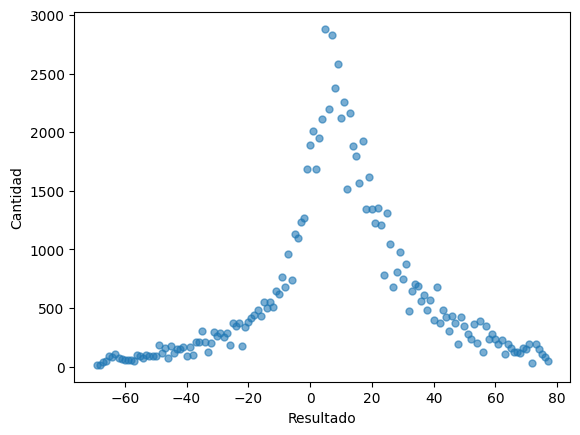

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

Cantidades=[]
for i in list(resultados):
  Cantidades.append([i,len({ k:v for k,v in resultados_duplicados.items() if v==i})])

Frecuencia_resultados=pd.DataFrame(Cantidades, columns=['Resultado','Cantidad'])
Frecuencia_resultados

Frecuencia_resultados.plot(kind='scatter', x='Resultado', y='Cantidad', s=25, alpha=0.6)

Muy cerca del cero existe mayor cantidad de veces que al evaluar una expresion nos da como resultado un numero entero que esta entre 0 y 10

Por lo anterir mostraremos el top 10 de la tabla de frecuencia

In [ ]:
display(Frecuencia_resultados.sort_values(by='Cantidad', ascending=False).head(10))

,Resultado,Cantidad
5,5,2880
7,7,2824
9,9,2584
8,8,2376
11,11,2256
6,6,2200
13,13,2160
10,10,2120
4,4,2112
1,1,2008


In [ ]:
sum(Frecuencia_resultados.sort_values(by='Cantidad', ascending=False).head(10)['Cantidad'])

23520

Como se puede apreciar en la tabla de frecuencia se evidencia que unicamente en el top 10 de los valores que mayor frecuencia de ocurrencia, se repiten mas de 23.000 veces, motivo por el cual se podria realizar una exploracion detallada al comportamiento de las evaluaciones para encontrar patrones que seguramente estan atadas a la combinatoria de signos y numeros, si se puede determinar una matriz que simplifique el problema descartando las evaluaciones de las expresiones siempre que cumpla el comportamiento del supuesto propuesto en estas linea.

Adicionalmente el problema se puede escalar o variar de muchas formas, como usar más dígitos, permitir operadores repetidos o incluir paréntesis, lo que lo convierte en un excelente caso de estudio para algoritmos de optimización y búsqueda inteligente.

## Justificacion teorica de minimo, maximo y rango

Como vimos en la ejecucion de cada uno de los algoritmos, su minimo es de -69, maximo de 77, lo que nos deja un rango total de 147 numeros enteros entre estos dos valores, ahora bien, si quisieramos justificar de manera teorica sus valores, utilizariamos los valores mas altos/bajos posibles seguidos de la combinacion de digitos que resten y sumen de manera conveniente, ejemplo

Para hallar el maximo utilizaria los valores mas grandes de nuestro set de numeros combinandolo con la multiplicacion, para obtener el valor mas alto posible, seguido de esto, utilizar los valores continuos en la division para que su resultado de resta sea minima, con ello obtenemos la siguiente expresion, vale aclarar, que esta no deja un resultado entero, por ello no se tiene en cuenta en el procesamiento de los algoritmos

In [ ]:
9 * 8 + 7 - 5 / 6

78.16666666666667

Un caso similar sucede para el valor minimo, donde se utilizaria la misma logica, lo que nos da como resultado una expresion de este tipo

In [ ]:
1 - 9 * 8 + 2 / 6


-70.66666666666667